# Who is coursera for, and if it's for you, which organization should you choose?

- Which are the highest rated courses, is there any correlation with the students enrolled?
- Which organizations have more courses
- Which organizations has more ratings
- What's the average rating per organization, which organization have more ratings and more students enrolled?
- How many different coursers are there?
- How is the difficulty relevant?

In [1]:
# Importing libraries and dataset from Coursera Courses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import seaborn as sns

df = pd.read_csv('sample_data/coursea_data.csv', index_col=0).sort_index()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


### Cleaning and basic exploring

In [2]:
# Tidying up dataset column names by removing course since we already defined that this is a coursera 
# course dataset.

df.columns = df.columns.str.replace('course_', '').str.lower()
df.columns

Index(['title', 'organization', 'certificate_type', 'rating', 'difficulty',
       'students_enrolled'],
      dtype='object')

In [3]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 891 observations and 6 features.


In [4]:
# Checking if there is any empty value in the dataset
df.isnull().any()

title                False
organization         False
certificate_type     False
rating               False
difficulty           False
students_enrolled    False
dtype: bool

In [5]:
# Checking if there is any duplicated in the dataset
df.duplicated().any()

False

In [6]:
# Checking each feature datatype to adjust if needed
df.dtypes

title                 object
organization          object
certificate_type      object
rating               float64
difficulty            object
students_enrolled     object
dtype: object

In [7]:
# Most of the columns might have mixed data types. We will work with string datatype for the
# storing columns: title, organization, certificate_type and course difficuly.
# for the rating and students_enrolled column we need them as floats.

df = df.astype({"title": 'string', "organization": 'string', "certificate_type": 'string', "difficulty": 'string'})
df.dtypes

title                 string
organization          string
certificate_type      string
rating               float64
difficulty            string
students_enrolled     object
dtype: object

In [8]:
# Exploring Certificate_type and course_difficulty column to assure there's not wrong values
df['difficulty'].unique()

<StringArray>
['Beginner', 'Mixed', 'Intermediate', 'Advanced']
Length: 4, dtype: string

In [9]:
df.certificate_type = df.certificate_type.str.title()
df['certificate_type'].unique()

<StringArray>
['Professional Certificate', 'Specialization', 'Course']
Length: 3, dtype: string

In [10]:
# Exploring students_enrolled column to convert all to floats
df['students_enrolled']

0      480k
1      310k
2      2.5m
3      1.5m
4      350k
       ... 
886     11k
887     33k
888    6.6k
889     45k
890    6.4k
Name: students_enrolled, Length: 891, dtype: object

In [37]:
# Function that takes number of students enrolled variable and check's if there's an m or a x and if there is 
# converts the value to digit
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0


# Applying the function to the students enrolled column.
df['students_enrolled'] = df['students_enrolled'].apply(value_to_float)
df['students_enrolled']

0       480000.0
1       310000.0
2      2500000.0
3      1500000.0
4       350000.0
         ...    
886      11000.0
887      33000.0
888       6600.0
889      45000.0
890       6400.0
Name: students_enrolled, Length: 891, dtype: float64

In [38]:
# Printing final cleaned dataframe for our analysis
df.head()

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,Professional Certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,Specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,Professional Certificate,4.8,Beginner,350000.0


## Exploring further the data and visualizing some relevant data

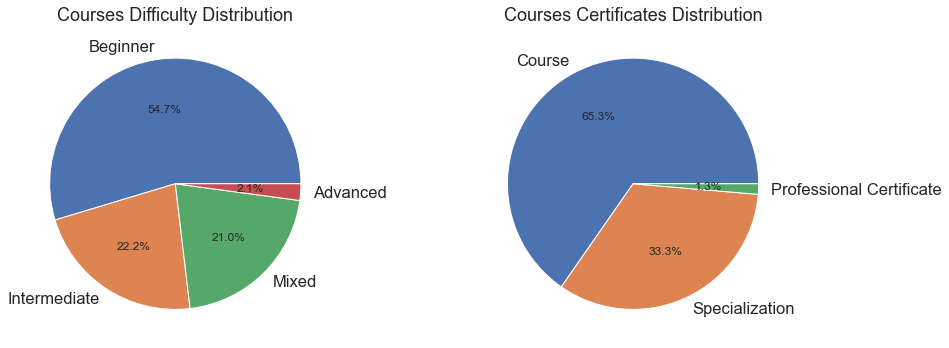

In [39]:
# Visualizing the count of courses for each category

hist_data = [df['difficulty'].value_counts(), df['certificate_type'].value_counts()]
titles = ['Courses Difficulty Distribution', 'Courses Certificates Distribution']

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.rcParams.update({'font.size': 12})

for i, data in enumerate(hist_data):
    ax[i].pie(data.values, labels = data.index, autopct='%1.1f%%')
    ax[i].set_title(titles[i])

fig.tight_layout()
plt.show()

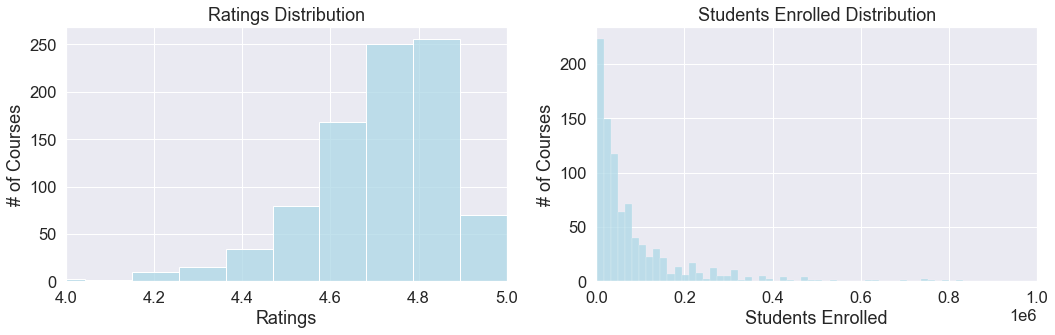

In [40]:
# Visualizing the distribution of ratings and students enrolled

hist_data = [df['rating'].values, df['students_enrolled'].values]
titles = ['Ratings Distribution', 'Students Enrolled Distribution']
xlabels = ['Ratings', 'Students Enrolled']
ylabels = ['# of Courses'] * 2
bins = [16,200]

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.set(font_scale=1.5)

for i, data in enumerate(hist_data):
    sns.histplot(data, kde=False, bins=bins[i], color="lightblue", ax=ax.flat[i])
    # we use flat to access to each element of the ax array
    ax.flat[i].set_xlabel(xlabels[i])
    ax.flat[i].set_ylabel(ylabels[i])
    ax.flat[i].set_title(titles[i])
    if i == 0:
        ax.flat[i].set_xlim(4.0, 5.0)
    elif i == 1:
        ax.flat[i].set_xlim(0.0, 1000000.0)

fig.tight_layout()
plt.show()

I observe a left skewed distribution, meaning that all the vast majority of points are concentrated towards the right side, most of the courses has high ratings and range between 4.6 and 4.8. Contrary, the students enrolled distribution shows the tail extending to the right, indicating that there are left a few values that are higher than the majority of the data points.

#### Ratings distribution and central tendency

In [44]:
# We will describe the values in the rating column
df['rating'].describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: rating, dtype: float64

In [45]:
# We will describe the values in the enrolled students column
df['students_enrolled'].describe()

count    8.910000e+02
mean     9.055208e+04
std      1.819365e+05
min      1.500000e+03
25%      1.750000e+04
50%      4.200000e+04
75%      9.950000e+04
max      3.200000e+06
Name: students_enrolled, dtype: float64

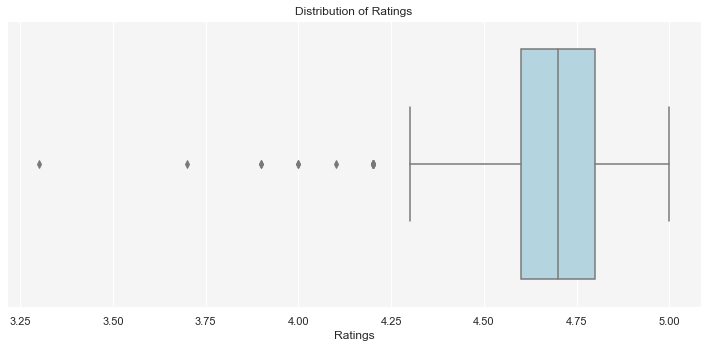

In [42]:
# Visualizing the distribution and central tendencies of the ratings

hist_data = df['rating'].values

fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

sns.boxplot(x=hist_data, color="lightblue")
#plt.xlim(3.5, 5.0)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")

fig.tight_layout()
plt.show()

In [314]:
# We will describe the most frequent rating value
df['rating'].mode()

0    4.8
Name: rating, dtype: float64

#### Number of Students Enrolled distribution and central tendency

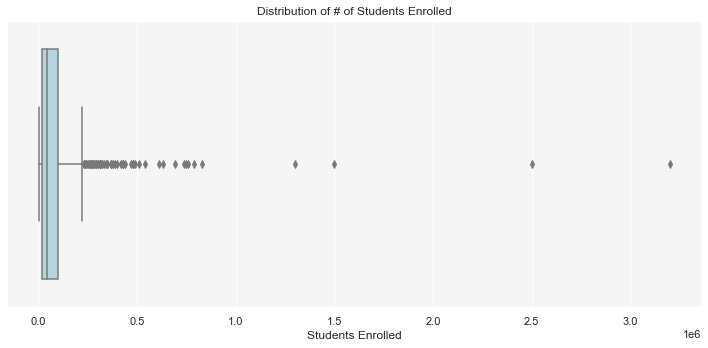

In [90]:
# Visualizing the distribution and central tendencies of the ratings

hist_data = df['students_enrolled'].values

fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

sns.boxplot(x=hist_data, color="lightblue")
#plt.xlim(3.5, 5.0)
plt.title("Distribution of # of Students Enrolled")
plt.xlabel("Students Enrolled")

fig.tight_layout()
plt.show()

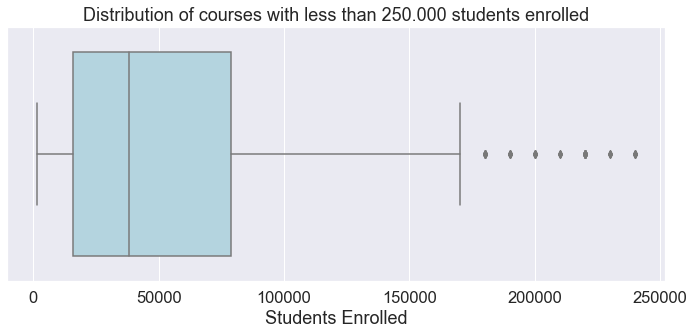

In [91]:
# Visualizing only Values less than 250.000 students enrolled for better visualization

# mask of values less than 250.000
hist_data = hist_data[hist_data < 250000]

fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)

sns.boxplot(x=hist_data, color="lightblue")
plt.title("Distribution of courses with less than 250.000 students enrolled")
plt.xlabel("Students Enrolled")

fig.tight_layout()
plt.show()

# poner estos dos plots en un subplot

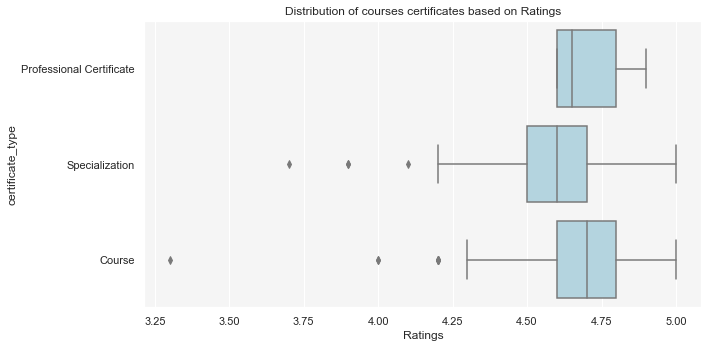

In [65]:
# mask of values less than 250.000

fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

sns.boxplot(x=df["rating"], y=df["certificate_type"], color='lightblue')
plt.title("Distribution of courses certificates based on Ratings")
plt.xlabel("Ratings")

fig.tight_layout()
plt.show()

Courses and professional's certificates tend to be higher rated.

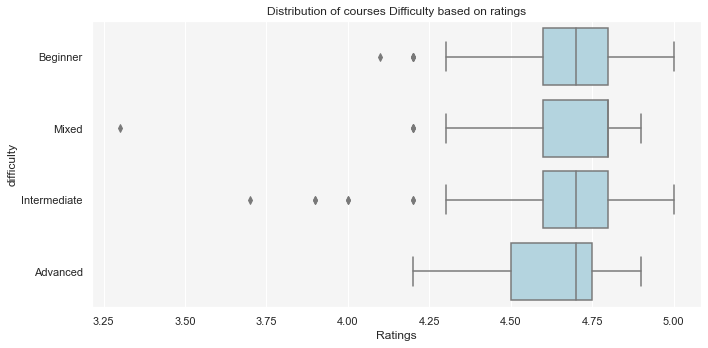

In [66]:

fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

sns.boxplot(x=df["rating"], y=df["difficulty"], color='lightblue')
plt.title("Distribution of courses Difficulty based on ratings")
plt.xlabel("Ratings")

fig.tight_layout()
plt.show()

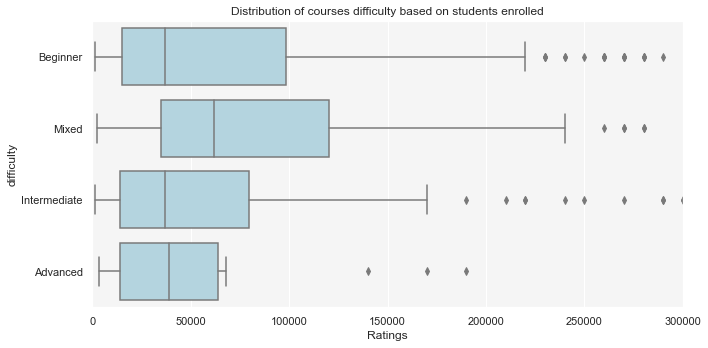

In [87]:
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

sns.boxplot(x=df["students_enrolled"], y=df["difficulty"], color='lightblue')
plt.title("Distribution of courses difficulty based on students enrolled")
plt.xlabel("Ratings")
plt.xlim(0.0, 300000)

fig.tight_layout()
plt.show()

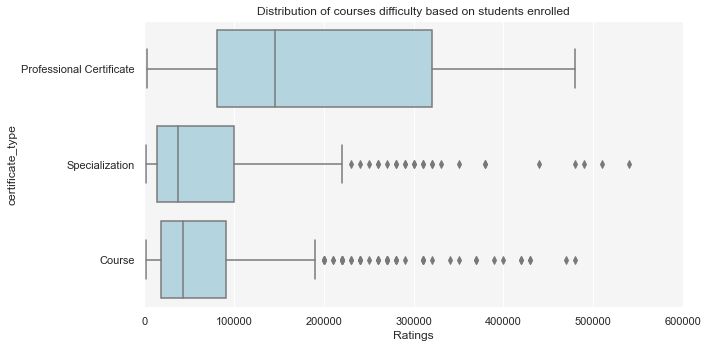

In [88]:
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})

sns.boxplot(x=df["students_enrolled"], y=df["certificate_type"], color='lightblue')
plt.title("Distribution of courses difficulty based on students enrolled")
plt.xlabel("Ratings")
plt.xlim(0.0, 600000)

fig.tight_layout()
plt.show()

# Relationship between difficulty and rating, rating and students_enrolled


Text(0.5, 1.0, 'Correlation between ratings and students enrolled')

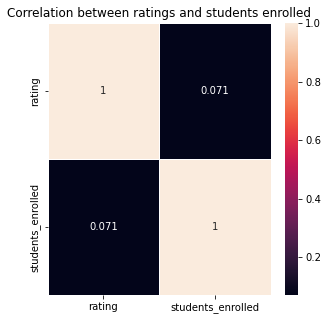

In [27]:
correlation = df.corr()
correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')
plt.title('Correlation between ratings and students enrolled')

Text(0.5, 1.0, 'Correlation between ratings and students enrolled')

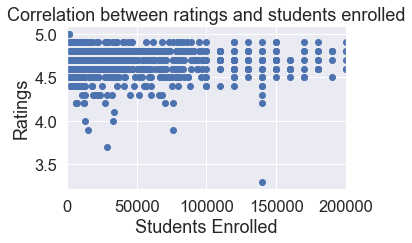

In [100]:
# Let's go further visualizing correlation with a scatter plot

y = np.array([df['rating']])
x = np.array([df['students_enrolled']])

plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.xlim(0, 200000)
plt.xlabel("Students Enrolled")
plt.ylabel("Ratings")
plt.title('Correlation between ratings and students enrolled')

The correlation between rating and students_enrolled is very low. The courses with higher number of students enrolled tend to have higher ratings.

In [101]:
contingency_table = pd.crosstab(df['certificate_type'], df['difficulty'])
contingency_table

difficulty,Advanced,Beginner,Intermediate,Mixed
certificate_type,,,,
Course,9,282,104,187
Professional Certificate,0,9,3,0
Specialization,10,196,91,0


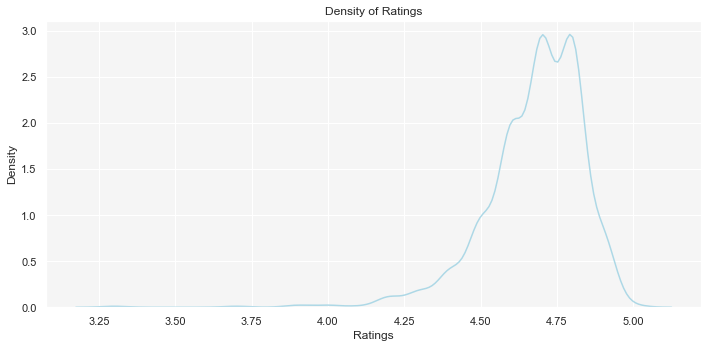

In [102]:
hist_data = df['rating'].values

fig = plt.figure(figsize=(10,5))

sns.set(font_scale=1.5)
sns.set(rc={'axes.facecolor':'whitesmoke'})
sns.kdeplot(data=hist_data, color="lightblue")

plt.title("Density of Ratings")
plt.xlabel("Ratings")

fig.tight_layout()
plt.show()

## Courses Overview

- Which courses has more students enrolled with higher ratings?

In [29]:
# Checking top courses as per higher number of students enrolled and highest ratings
top_courses = df[df['rating'] >= 4.9].sort_values(by='students_enrolled', ascending=False).head(10)
top_courses

,title,organization,certificate_type,rating,difficulty,students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
62,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,Intermediate,630000.0
111,Python Data Structures,University of Michigan,COURSE,4.9,Mixed,420000.0
113,First Step Korean,Yonsei University,COURSE,4.9,Beginner,400000.0
29,Introduction to Psychology,Yale University,COURSE,4.9,Beginner,270000.0
123,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,COURSE,4.9,Beginner,270000.0
11,Excel Skills for Business,Macquarie University,SPECIALIZATION,4.9,Beginner,240000.0
207,Convolutional Neural Networks,deeplearning.ai,COURSE,4.9,Intermediate,240000.0
21,COVID-19 Contact Tracing,Johns Hopkins University,COURSE,4.9,Beginner,220000.0


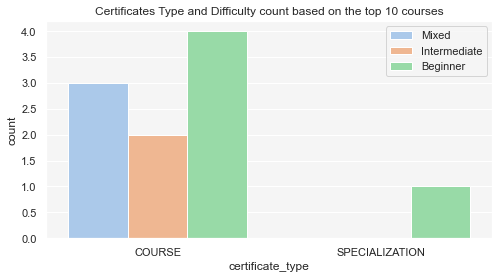

In [42]:
# Visualizing certificates and difficulties level for the top 10 courses based on high ratings and max
# number of students enrolled


sns.set(rc={'figure.figsize':(8, 4), 'axes.facecolor':'whitesmoke',})
sns.countplot(data=top_courses, 
              x='certificate_type', palette="pastel",
              hue='difficulty').set(title="Certificates Type and Difficulty count based on the top 10 courses")

# Place legend to the right
plt.legend(loc='upper right')

The most rated courses with higher number of students enroll tend to be COURSES certificate type with a variety of difficulty levels, but mostly beginner courses. The only top specialization is for beginners.

In [43]:
# What courses has the most students enrolled?
top_courses_num_students = df[df['students_enrolled'] >= 100000].sort_values(by='students_enrolled', 
                                                                             ascending=False).head(10)
top_courses_num_students

,title,organization,certificate_type,rating,difficulty,students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
44,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
175,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760000.0
40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000.0


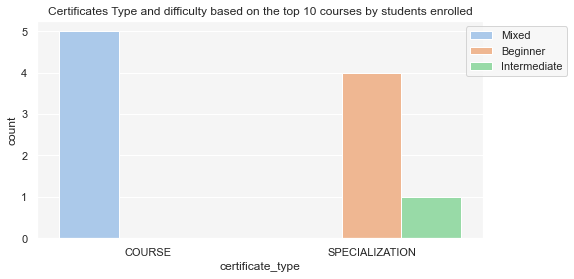

In [46]:
# Visualizing certificates and difficulties level for the top 10 courses based on max
# number of students enrolled

sns.set(rc={'figure.figsize':(8, 4), 'axes.facecolor':'whitesmoke',})
sns.countplot(data=top_courses_num_students, 
              x='certificate_type', palette="pastel",
              hue='difficulty').set(title="Certificates Type and difficulty based on the top 10 courses by students enrolled")

# Place legend to the right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

## Certificate & Difficulty overview

- Which type of certificate is more popular?
- Which type of certificate students tend to enroll to?


- How is the difficulty relevant?
- How many types of certificates are there

In [45]:
# Let's get some insights from each certificate type and difficulty levels

# average ratings per certificate type
# average students enrolled per certificate type

certificate_count = df['certificate_type'].value_counts()
difficulty_count = df['difficulty'].value_counts()
certificate_count

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: certificate_type, dtype: Int64

We can see that the most popular certifications are the Courses types and most of them are beginner friendly
but also we can observe a high amount of mixed difficulty level.

All the Professional certificates are for beginners meanwhile specializations are for beginners or 
for intermediate students. Only a minority are advanced level.

## Organizations overview

- How many organizations are doing courses?
- What organizations have more courses? and which ones less?
- How many courses of each certificate type have each organization?
- What's the average rating per organization and which organization have the highest 
ratings average and more students enrolled? Which one has the lowest students enrolled and have the highest ratings?
- Which are the TOP 10 organizations?
- Which organizations has more students enrolled?

In [345]:
# How many organizations has courses on Coursera?

print(f" There's {len(df['organization'].unique())} organizations that has courses in Coursera")

 There's 154 organizations that has courses in Coursera


In [346]:
# What organizations has courses on Coursera

org_courses = df['organization'].value_counts().sort_values(ascending=False)
org_courses


University of Pennsylvania                      59
University of Michigan                          41
Google Cloud                                    34
Duke University                                 28
Johns Hopkins University                        28
                                                ..
Bloomsbury Learning Exchange                     1
JetBrains                                        1
Nanyang Technological University, Singapore      1
Royal Holloway, University of London             1
American Institute of Business and Economics     1
Name: organization, Length: 154, dtype: Int64

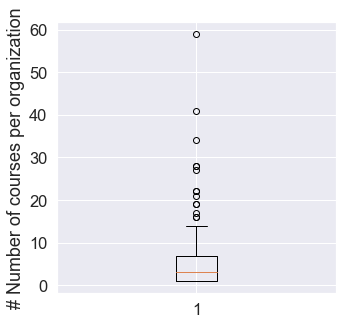

In [347]:
# Let's quick check how the data is distributed with a box plot
plt.figure(figsize=(5, 5))
plt.boxplot(org_courses)
plt.ylabel('# Number of courses per organization')
plt.show()

Most of the organizations has less than 15 courses in Coursera.

In [348]:
# Finding out the top 10 organizations, which I will consider those with higher number of students
# and high ratings based on the students enrolled
top_10_organizations = df[['organization', 'rating', 'students_enrolled']].groupby('organization').mean().sort_values(by=['students_enrolled'],ascending = [False])
# Let's select only those with ratings above 4.7
top_10_organizations = top_10_organizations.loc[top_10_organizations.rating >= 4.7].head(10)
top_10_organizations

,rating,students_enrolled
organization,,
Stanford University,4.768750,303375.000000
Yale University,4.817647,232470.588235
McMaster University,4.800000,230000.000000
Google - Spectrum Sharing,4.900000,210000.000000
Ludwig-Maximilians-Universität München (LMU),4.750000,192500.000000
École Polytechnique,4.800000,190000.000000
University of Michigan,4.729268,181407.317073
deeplearning.ai,4.743750,178962.500000
Yonsei University,4.750000,140750.000000


In [40]:
top_10_organizations.describe()

,rating,students_enrolled
count,10.000000,10.000000
mean,4.784275,199263.207198
std,0.049733,49054.473460
min,4.729268,133166.666667
25%,4.750000,179573.704268
50%,4.776042,191250.000000
75%,4.800000,225000.000000
max,4.900000,303375.000000


The least popular courses are the professional certificates. 